In [18]:
# web-scrapping packages
import requests
from bs4 import BeautifulSoup

# data management packages
import pandas as pd

# hide warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# eda packages
import numpy as np
import matplotlib.pylab as plt
plt.style.use('ggplot')
import seaborn as sns

Define Functions

In [15]:
# scraps data using BeautifulSoup

def make_soup(url):
    html_data = requests.get(url)
    html_data.raise_for_status()
    soup = BeautifulSoup(html_data.text, 'html').find("div", class_="lister-list")

    return soup

In [11]:
# takes a soup (scrapped data) from a page, and produces a dataframe

def make_dataframe(soup):
    page_data = pd.DataFrame(columns=["Title", "Year", "Certificate", "Runtime", "Genre", "IMDB", "Metascore", "Director", "Votes", "Gross"])

    for row in soup.find_all("div", class_="lister-item mode-advanced"):
        col = row.find("div", class_="lister-item-content")

        #scrapping the webpage
        title = col.h3.a.text
        year = col.h3.find("span", class_="lister-item-year").text
        runtime = col.find_all("p")[0].find(class_="runtime").text
        genre = col.find_all("p")[0].find(class_="genre").text.strip()
        director = col.find_all("p")[2].a.text
        
        cert = col.find_all("p")[0].find(class_="certificate")
        if cert:
            certificate = cert.text
        else:
            certificate = None
        
        try:
            imdb_score = col.find(class_="ratings-bar").find(class_="inline-block ratings-imdb-rating").strong.text
        except AttributeError:
            imdb_score = None

        try:
            meta_score = col.find(class_="ratings-bar").find(class_="inline-block ratings-metascore").span.text
        except AttributeError:
            meta_score = None
        
        if col.find_all("p")[3].find_all("span")[0].text == "Votes:":
            try:
                votes = col.find_all("p")[3].find_all("span")[1].text
            except IndexError:
                votes = None
        else:
            votes = None

        if col.find_all("p")[3].find_all("span")[-2].text == "Gross:":
            try:
                gross = col.find_all("p")[3].find_all("span")[-1].text
            except IndexError:
                gross = None
        else:
            gross = None

        # save data in dataframe
        page_data = page_data.append({
            "Title":title,
            "Year":year,
            "Certificate":certificate,
            "Runtime":runtime,
            "Genre":genre,
            "IMDB":imdb_score,
            "Metascore":meta_score,
            "Director":director,
            "Votes":votes,
            "Gross":gross
        }, ignore_index=True)

    return page_data

Multiple Pages

In [12]:
# page1 = "https://www.imdb.com/search/title/?title_type=movie&genres=animation&sort=boxoffice_gross_us,desc&explore=title_type,genres"
# page2 = "https://www.imdb.com/search/title/?title_type=movie&genres=animation&sort=boxoffice_gross_us,desc&start=51&explore=title_type,genres&ref_=adv_nxt"
# page3 = "https://www.imdb.com/search/title/?title_type=movie&genres=animation&sort=boxoffice_gross_us,desc&start=101&explore=title_type,genres&ref_=adv_nxt"

In [13]:
# preparing urls

# since url for 1st page is different from the rest, the url is included 1st in list
urls = ["https://www.imdb.com/search/title/?title_type=movie&genres=animation&sort=boxoffice_gross_us,desc&explore=title_type,genres"]

# looping to create the rest of the urls
for i in range(51,502,50):
    url = "https://www.imdb.com/search/title/?title_type=movie&genres=animation&sort=boxoffice_gross_us,desc&start=" +str(i)+ "&explore=title_type,genres&ref_=adv_nxt"
    urls.append(url)

print(str(len(urls)) + " pages")
urls

11 pages


['https://www.imdb.com/search/title/?title_type=movie&genres=animation&sort=boxoffice_gross_us,desc&explore=title_type,genres',
 'https://www.imdb.com/search/title/?title_type=movie&genres=animation&sort=boxoffice_gross_us,desc&start=51&explore=title_type,genres&ref_=adv_nxt',
 'https://www.imdb.com/search/title/?title_type=movie&genres=animation&sort=boxoffice_gross_us,desc&start=101&explore=title_type,genres&ref_=adv_nxt',
 'https://www.imdb.com/search/title/?title_type=movie&genres=animation&sort=boxoffice_gross_us,desc&start=151&explore=title_type,genres&ref_=adv_nxt',
 'https://www.imdb.com/search/title/?title_type=movie&genres=animation&sort=boxoffice_gross_us,desc&start=201&explore=title_type,genres&ref_=adv_nxt',
 'https://www.imdb.com/search/title/?title_type=movie&genres=animation&sort=boxoffice_gross_us,desc&start=251&explore=title_type,genres&ref_=adv_nxt',
 'https://www.imdb.com/search/title/?title_type=movie&genres=animation&sort=boxoffice_gross_us,desc&start=301&explore=

In [55]:
data_raw = pd.DataFrame()

for i,url in enumerate(urls):
    soup = make_soup(url)
    data_new = make_dataframe(soup)
    data_raw = pd.concat([data_raw, data_new], ignore_index=True)

    print("Page " +str(i)+ " done")

data_raw

Page 0 done
Page 1 done
Page 2 done
Page 3 done
Page 4 done
Page 5 done
Page 6 done
Page 7 done
Page 8 done
Page 9 done
Page 10 done


,Title,Year,Certificate,Runtime,Genre,IMDB,Metascore,Director,Votes,Gross
0,Incredibles 2,(2018),P13,118 min,"Animation, Action, Adventure",7.6,80,Brad Bird,"314,015",$608.58M
1,The Lion King,(2019),P13,118 min,"Animation, Adventure, Drama",6.8,55,Jon Favreau,"256,869",$543.64M
2,Finding Dory,(2016),U,97 min,"Animation, Adventure, Comedy",7.3,77,Andrew Stanton,"289,989",$486.30M
3,Frozen II,(2019),P13,103 min,"Animation, Adventure, Comedy",6.8,64,Chris Buck,"183,537",$477.37M
4,Shrek 2,(2004),U,93 min,"Animation, Adventure, Comedy",7.3,75,Andrew Adamson,"485,209",$436.47M
...,...,...,...,...,...,...,...,...,...,...
545,Mind Game,(I) (2004),None,103 min,"Animation, Adventure, Comedy",7.7,66,Masaaki Yuasa,"10,196",$0.04M
546,Le grand méchant renard et autres contes...,(2017),G,83 min,"Animation, Adventure, Comedy",7.4,73,Patrick Imbert,"3,454",$0.04M
547,The Films of the Brothers Quay,,None,78 min,"Documentary, Animation",None,None,Stephen Quay,None,$0.04M
548,Bai She: Yuan qi,(2019),None,99 min,"Animation, Action, Adventure",7.0,60,Amp Wong,"4,894",$0.03M


Data Cleaning
- Gross: remove $ sign 
- Year: remove () 
- Runtime: remove min 
- Year, Runtime, IMDB, Metascore, Votes, Gross: change data type 

In [ ]:
# save raw data before performing data cleaning
data_raw.to_csv("imdb_animation_data_raw.csv")

# make a copy
data_cleaned = data_raw.copy()

In [ ]:
# remove punctuations & symbols
data_cleaned['Gross'] = data_cleaned['Gross'].str.replace('$',"").str.replace('M',"")
data_cleaned['Year'] = data_cleaned['Year'].str.replace('(',"").str.replace(')',"").str.replace('I',"")
data_cleaned['Runtime'] = data_cleaned['Runtime'].str.replace("min", "")
data_cleaned['Votes'] = data_cleaned['Votes'].str.replace(",", "")

data_cleaned.tail()

,Title,Year,Certificate,Runtime,Genre,IMDB,Metascore,Director,Votes,Gross
545,Mind Game,2004,None,103,"Animation, Adventure, Comedy",7.7,66,Masaaki Yuasa,10196,0.04
546,Le grand méchant renard et autres contes...,2017,G,83,"Animation, Adventure, Comedy",7.4,73,Patrick Imbert,3454,0.04
547,The Films of the Brothers Quay,,None,78,"Documentary, Animation",None,None,Stephen Quay,None,0.04
548,Bai She: Yuan qi,2019,None,99,"Animation, Action, Adventure",7.0,60,Amp Wong,4890,0.03
549,Rakuen Tsuiho: Expelled from Paradise,2014,None,104,"Animation, Action, Adventure",6.6,None,Seiji Mizushima,1799,0.03


In [ ]:
# change data types for selected columns
data_cleaned[["Year", "Runtime", "IMDB", "Metascore", "Votes", "Gross"]] = data_cleaned[["Year", "Runtime", "IMDB", "Metascore", "Votes", "Gross"]].apply(pd.to_numeric)

data_cleaned.tail()

,Title,Year,Certificate,Runtime,Genre,IMDB,Metascore,Director,Votes,Gross
545,Mind Game,2004.0,None,103,"Animation, Adventure, Comedy",7.7,66.0,Masaaki Yuasa,10196.0,0.04
546,Le grand méchant renard et autres contes...,2017.0,G,83,"Animation, Adventure, Comedy",7.4,73.0,Patrick Imbert,3454.0,0.04
547,The Films of the Brothers Quay,NaN,None,78,"Documentary, Animation",NaN,NaN,Stephen Quay,NaN,0.04
548,Bai She: Yuan qi,2019.0,None,99,"Animation, Action, Adventure",7.0,60.0,Amp Wong,4890.0,0.03
549,Rakuen Tsuiho: Expelled from Paradise,2014.0,None,104,"Animation, Action, Adventure",6.6,NaN,Seiji Mizushima,1799.0,0.03


In [ ]:
# save cleaned data

data_cleaned.to_csv("imdb_animation_data.csv")

EDA - Exploratory Data Analysis

In [ ]:
data_cleaned.shape

(550, 11)

In [24]:
data_cleaned.dtypes

Unnamed: 0       int64
Title           object
Year           float64
Certificate     object
Runtime          int64
Genre           object
IMDB           float64
Metascore      float64
Director        object
Votes          float64
Gross          float64
dtype: object

In [25]:
data_cleaned.describe()

,Unnamed: 0,Year,Runtime,IMDB,Metascore,Votes,Gross
count,550.000000,549.000000,550.000000,547.000000,432.000000,5.470000e+02,550.000000
mean,274.500000,2004.143898,91.812727,6.628885,61.263889,9.976533e+04,62.715873
std,158.915596,15.670282,13.666447,0.970332,17.610501,1.717767e+05,93.624136
min,0.000000,1937.000000,53.000000,2.800000,12.000000,1.600000e+01,0.030000
25%,137.250000,1999.000000,82.000000,6.100000,49.000000,5.793000e+03,0.872500
50%,274.500000,2008.000000,90.000000,6.800000,62.000000,2.951400e+04,19.540000
75%,411.750000,2016.000000,99.000000,7.300000,74.000000,1.225520e+05,86.040000
max,549.000000,2023.000000,154.000000,8.600000,99.000000,1.153547e+06,608.580000


Text(0, 0.5, 'Count')

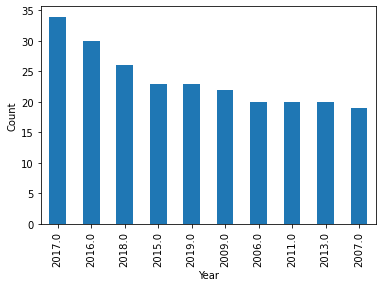

In [29]:
ax = data_cleaned['Year'].value_counts()\
        .head(10)\
        .plot(kind='bar')

ax.set_xlabel('Year')
ax.set_ylabel('Count')

<AxesSubplot:ylabel='Frequency'>

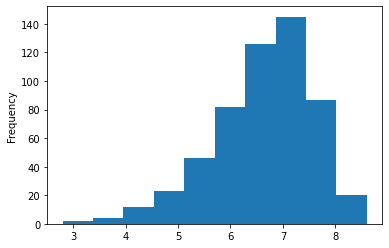

In [36]:
data_cleaned['IMDB'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

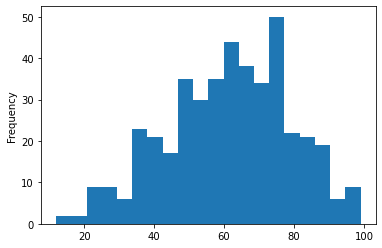

In [41]:
data_cleaned['Metascore'].plot(kind='hist', bins=20)

EDA - Relationships

<AxesSubplot:xlabel='Runtime', ylabel='Gross'>

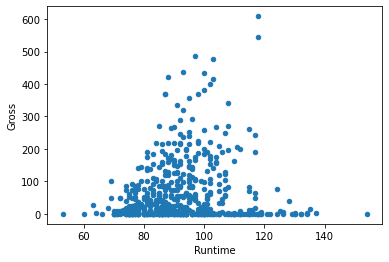

In [43]:
data_cleaned.plot(kind='scatter', x='Runtime', y='Gross')

<AxesSubplot:xlabel='Runtime', ylabel='Gross'>

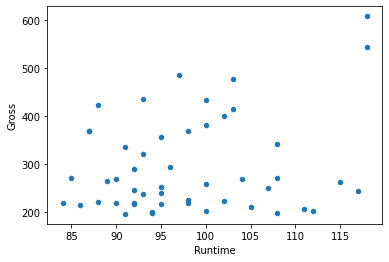

In [48]:
data_cleaned.head(50).plot(kind='scatter', x='Runtime', y='Gross')

<AxesSubplot:xlabel='IMDB', ylabel='Gross'>

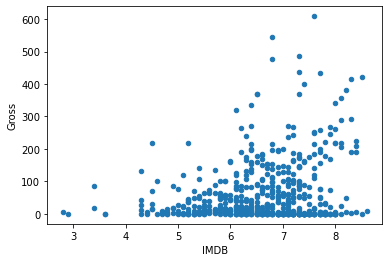

In [44]:
data_cleaned.plot(kind='scatter', x='IMDB', y='Gross')

<AxesSubplot:xlabel='Metascore', ylabel='Gross'>

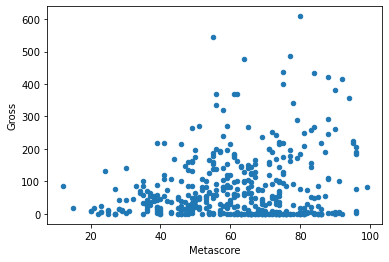

In [45]:
data_cleaned.plot(kind='scatter', x='Metascore', y='Gross')

<AxesSubplot:xlabel='Year', ylabel='Gross'>

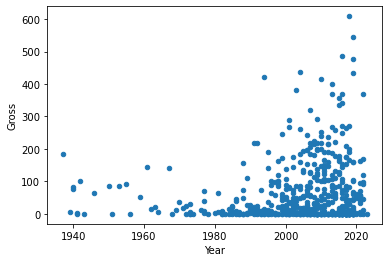

In [46]:
data_cleaned.plot(kind='scatter', x='Year', y='Gross')

<AxesSubplot:xlabel='Year', ylabel='Gross'>

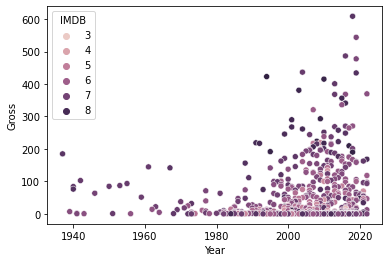

In [54]:
sns.scatterplot(x='Year', y='Gross',
                hue='IMDB',
                data=data_cleaned)

In [51]:
# correlation
data_cleaned[['Year', 'Runtime', 'IMDB', 'Metascore', 'Gross']].dropna().corr()

,Year,Runtime,IMDB,Metascore,Gross
Year,1.000000,0.303764,-0.142399,-0.179835,0.123077
Runtime,0.303764,1.000000,0.249211,0.119253,0.143018
IMDB,-0.142399,0.249211,1.000000,0.816975,0.181314
Metascore,-0.179835,0.119253,0.816975,1.000000,0.194465
Gross,0.123077,0.143018,0.181314,0.194465,1.000000
